# <center>Converting 3D model (STL) to NIfTI images</center>

##### Loading the required libraries

In [ ]:
import trimesh
import numpy as np  
import vtkplotter as vtk
import ants

##### Loading stl file

In [2]:
mesh = trimesh.load_mesh("./VHF_Kidney_L_High.stl", remove_empty_areas=False)

face_normals all zero, ignoring!


##### Displaying the image

In [ ]:
mesh.visual.face_colors = [100, 100, 100, 255]
mesh.show(viewer='gl')

In [ ]:
pc1 = vtk.Points(mesh.vertices, r=10)
vtk.show([(mesh,pc1)], N=1, bg="white", axes=1)

##### Generating the voxel grid

In [14]:
volume=mesh.voxelized(pitch=0.5)

In [15]:
voxel_grid=volume.matrix
np_voxel_grid=np.asarray(voxel_grid*1.)

In [16]:
np_voxel_grid.shape

(180, 264, 191)

In [17]:
np_voxel_grid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

##### Converting the numpy voxel grid to ants image and storing it in nifti format

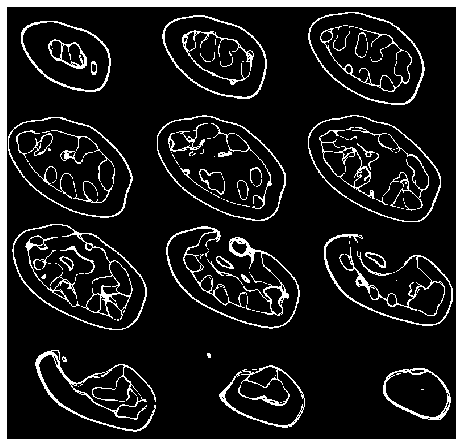

In [18]:
img=ants.from_numpy(np_voxel_grid)
ants.plot(img)

##### Saving the nifti file

In [ ]:
ants.image_write(img,'./VHF_Kidney_L_High.nii.gz')

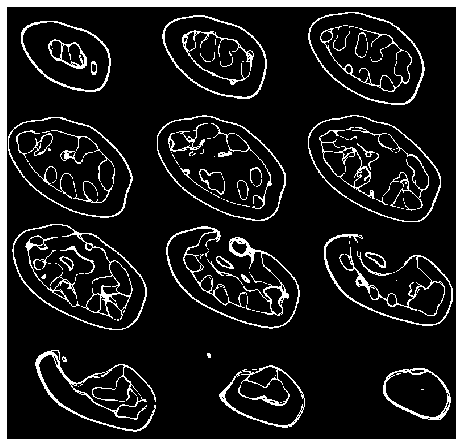

In [22]:
img2=ants.core.ants_image_io.image_read('./VHF_Kidney_L_High.nii.gz')
ants.plot(img2)